In [680]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
df = pd.read_table('column_2C.dat',sep='\s+', header = None)
df.columns = ['PelvicIncidence', 'PelvicTilt', 'LumbarLordosisAngle', 'SacralSlope', 'PelvicRadius','DegreeSpondylolisthesis','Class']
df.head()

,PelvicIncidence,PelvicTilt,LumbarLordosisAngle,SacralSlope,PelvicRadius,DegreeSpondylolisthesis,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


<AxesSubplot:xlabel='Class', ylabel='count'>

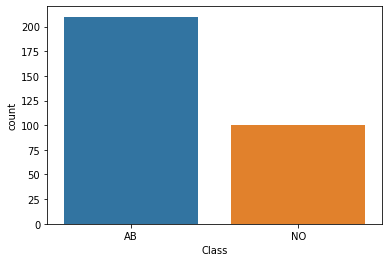

In [681]:
ax = plt.figure(0)
sns.countplot(x='Class',data = df)

In [682]:
df.Class.value_counts()

AB    210
NO    100
Name: Class, dtype: int64

In [683]:
df = df.sample(frac=1,random_state=4)
df.reset_index(drop =True, inplace=True)
df.head()

,PelvicIncidence,PelvicTilt,LumbarLordosisAngle,SacralSlope,PelvicRadius,DegreeSpondylolisthesis,Class
0,58.10,14.84,79.65,43.26,113.59,50.24,AB
1,56.45,19.44,43.58,37.00,139.19,-1.86,NO
2,92.03,35.39,77.42,56.63,115.72,58.06,AB
3,38.66,12.99,40.00,25.68,124.91,2.70,AB
4,38.70,13.44,31.00,25.25,123.16,1.43,AB


Text(0.5, 1.0, 'Heatmap showing Null values')

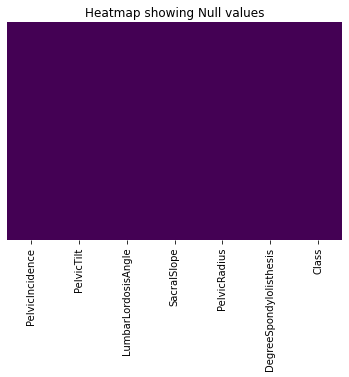

In [684]:
#Heatmap showing Null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Heatmap showing Null values')

Text(0.5, 0.98, 'Before Data Cleaning')

<Figure size 432x288 with 0 Axes>

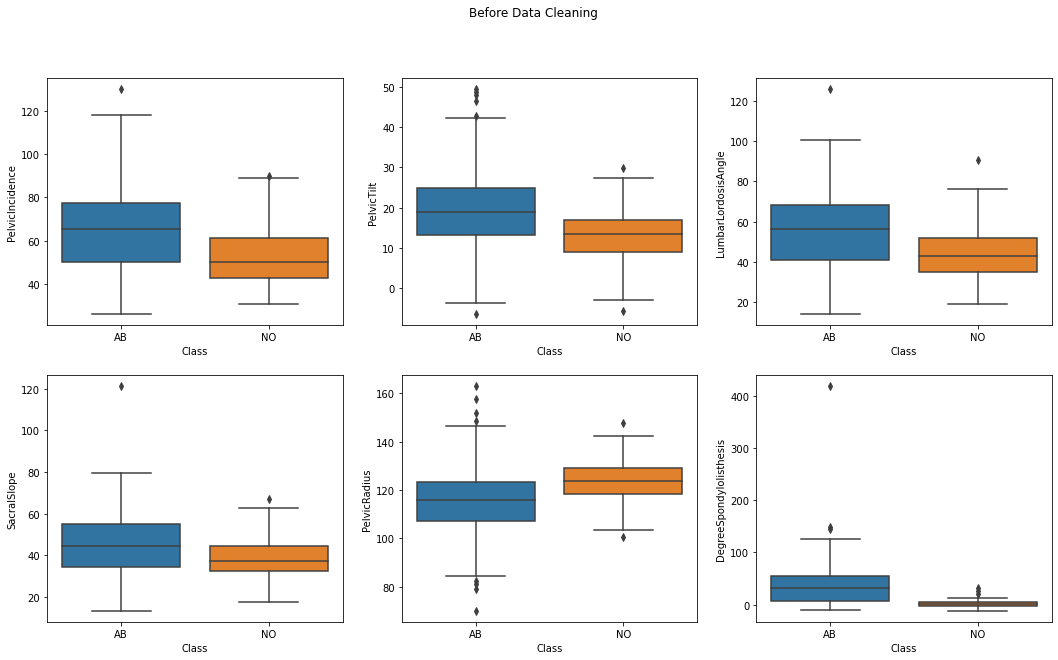

In [685]:
f = plt.figure(1)
plt.subplots(2,3,figsize=(18,10))

plt.subplot(2,3,1)
sns.boxplot(x='Class',y='PelvicIncidence',data = df);

plt.subplot(2,3,2)
sns.boxplot(x='Class',y='PelvicTilt',data = df);

plt.subplot(2,3,3)
sns.boxplot(x='Class',y='LumbarLordosisAngle',data = df);

plt.subplot(2,3,4)
sns.boxplot(x='Class',y='SacralSlope',data = df);

plt.subplot(2,3,5)
sns.boxplot(x='Class',y='PelvicRadius',data = df);

plt.subplot(2,3,6)
sns.boxplot(x='Class',y='DegreeSpondylolisthesis',data = df);


f.tight_layout(h_pad = 3)
plt.suptitle('Before Data Cleaning')

In [686]:
for k in range(len(df.columns)-1):
    PIAB = df.loc[df.Class=='AB',df.columns[k]]
    Q1 = PIAB.quantile(0.25)
    Q3 = PIAB.quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
    df[df.columns[k]][(df[df.columns[k]]>upper_limit) & (df.Class == 'AB')] = PIAB.quantile(0.75)
    df[df.columns[k]][(df[df.columns[k]]<lower_limit) & (df.Class == 'AB')] = PIAB.quantile(0.25)

    PINO = df.loc[df.Class=='NO',df.columns[k]]
    Q1 = PINO.quantile(0.25)
    Q3 = PINO.quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
    df[df.columns[k]][(df[df.columns[k]]>upper_limit) & (df.Class == 'NO')] = PINO.quantile(0.75)
    df[df.columns[k]][(df[df.columns[k]]<lower_limit) & (df.Class == 'NO')] = PINO.quantile(0.25)



<Figure size 432x288 with 0 Axes>

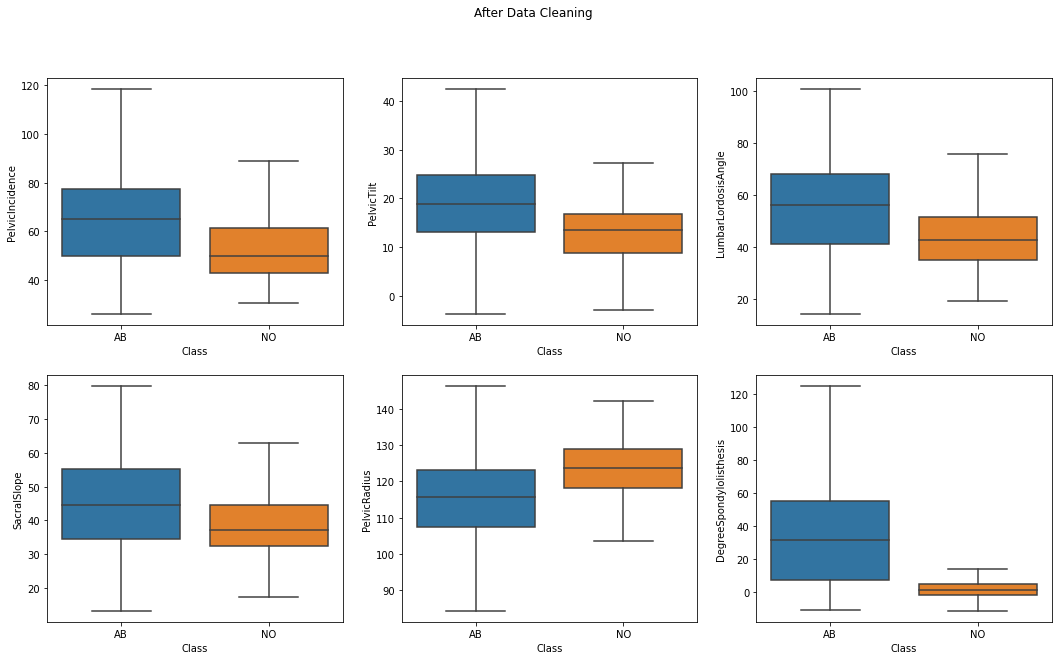

In [687]:
f = plt.figure(7)
plt.subplots(2,3,figsize=(18,10))

plt.subplot(2,3,1)
sns.boxplot(x='Class',y='PelvicIncidence',data = df);

plt.subplot(2,3,2)
sns.boxplot(x='Class',y='PelvicTilt',data = df);

plt.subplot(2,3,3)
sns.boxplot(x='Class',y='LumbarLordosisAngle',data = df);

plt.subplot(2,3,4)
sns.boxplot(x='Class',y='SacralSlope',data = df);

plt.subplot(2,3,5)
sns.boxplot(x='Class',y='PelvicRadius',data = df);

plt.subplot(2,3,6)
sns.boxplot(x='Class',y='DegreeSpondylolisthesis',data = df);

plt.suptitle('After Data Cleaning')
f.tight_layout(h_pad = 3)
f.savefig('AfterDC.pdf')


<Figure size 432x288 with 0 Axes>

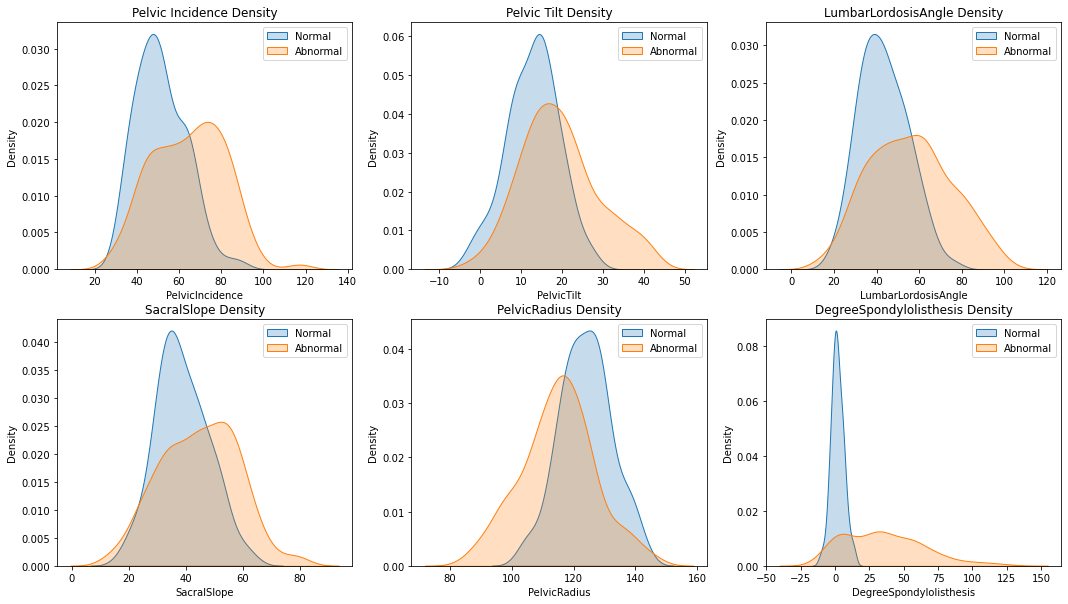

In [720]:
f = plt.figure()
plt.subplots(2,3,figsize=(18,10))

plt.subplot(2,3,1)
sns.kdeplot(x=df.PelvicIncidence[df.Class=='NO'],shade = True,label ='Normal')
sns.kdeplot(x=df.PelvicIncidence[df.Class=='AB'],shade = True,label ='Abnormal')
plt.title('Pelvic Incidence Density')
plt.legend()

plt.subplot(2,3,2)
sns.kdeplot(x=df.PelvicTilt[df.Class=='NO'],shade = True,label ='Normal')
sns.kdeplot(x=df.PelvicTilt[df.Class=='AB'],shade = True,label ='Abnormal')
plt.title('Pelvic Tilt Density')
plt.legend()

plt.subplot(2,3,3)
sns.kdeplot(x=df.LumbarLordosisAngle[df.Class=='NO'],shade = True,label ='Normal')
sns.kdeplot(x=df.LumbarLordosisAngle[df.Class=='AB'],shade = True,label ='Abnormal')
plt.title('LumbarLordosisAngle Density')
plt.legend()

plt.subplot(2,3,4)
sns.kdeplot(x=df.SacralSlope[df.Class=='NO'],shade = True,label ='Normal')
sns.kdeplot(x=df.SacralSlope[df.Class=='AB'],shade = True,label ='Abnormal')
plt.title('SacralSlope Density')
plt.legend()

plt.subplot(2,3,5)
sns.kdeplot(x=df.PelvicRadius[df.Class=='NO'],shade = True,label ='Normal')
sns.kdeplot(x=df.PelvicRadius[df.Class=='AB'],shade = True,label ='Abnormal')
plt.title('PelvicRadius Density')
plt.legend()

plt.subplot(2,3,6)
sns.kdeplot(x=df.DegreeSpondylolisthesis[df.Class=='NO'],shade = True,label ='Normal')
sns.kdeplot(x=df.DegreeSpondylolisthesis[df.Class=='AB'],shade = True,label ='Abnormal')
plt.title('DegreeSpondylolisthesis Density')
plt.legend()

In [689]:
df.columns

Index(['PelvicIncidence', 'PelvicTilt', 'LumbarLordosisAngle', 'SacralSlope',
       'PelvicRadius', 'DegreeSpondylolisthesis', 'Class'],
      dtype='object')

In [690]:
DataMapping = {'AB': 1, 'NO': 0}
df.Class = df.Class.map(DataMapping)
df

,PelvicIncidence,PelvicTilt,LumbarLordosisAngle,SacralSlope,PelvicRadius,DegreeSpondylolisthesis,Class
0,58.10,14.8400,79.650,43.26,113.59,50.24,1
1,56.45,19.4400,43.580,37.00,139.19,-1.86,0
2,92.03,35.3900,77.420,56.63,115.72,58.06,1
3,38.66,12.9900,40.000,25.68,124.91,2.70,1
4,38.70,13.4400,31.000,25.25,123.16,1.43,1
...,...,...,...,...,...,...,...
305,43.20,19.6600,35.000,23.54,124.85,-2.92,1
306,44.91,10.2200,44.630,34.70,130.08,37.36,1
307,58.83,37.5800,68.105,21.25,135.63,117.31,1
308,61.41,25.3800,39.100,36.03,103.40,21.84,1


In [691]:
df.dtypes

PelvicIncidence            float64
PelvicTilt                 float64
LumbarLordosisAngle        float64
SacralSlope                float64
PelvicRadius               float64
DegreeSpondylolisthesis    float64
Class                        int64
dtype: object

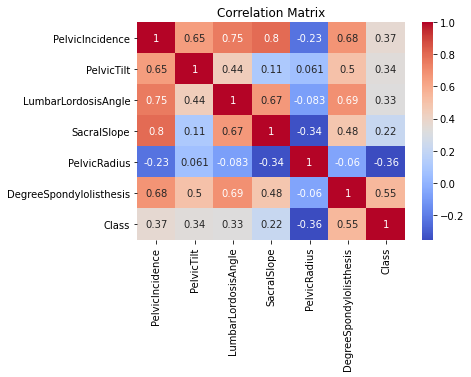

In [692]:
#Here we use default correlation method Pearson Correlation Coefficient Technique

plt.figure(3)
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm');
plt.title('Correlation Matrix')
plt.savefig('Corr_Heatmap.pdf',bbox_inches='tight')


<Figure size 432x288 with 0 Axes>

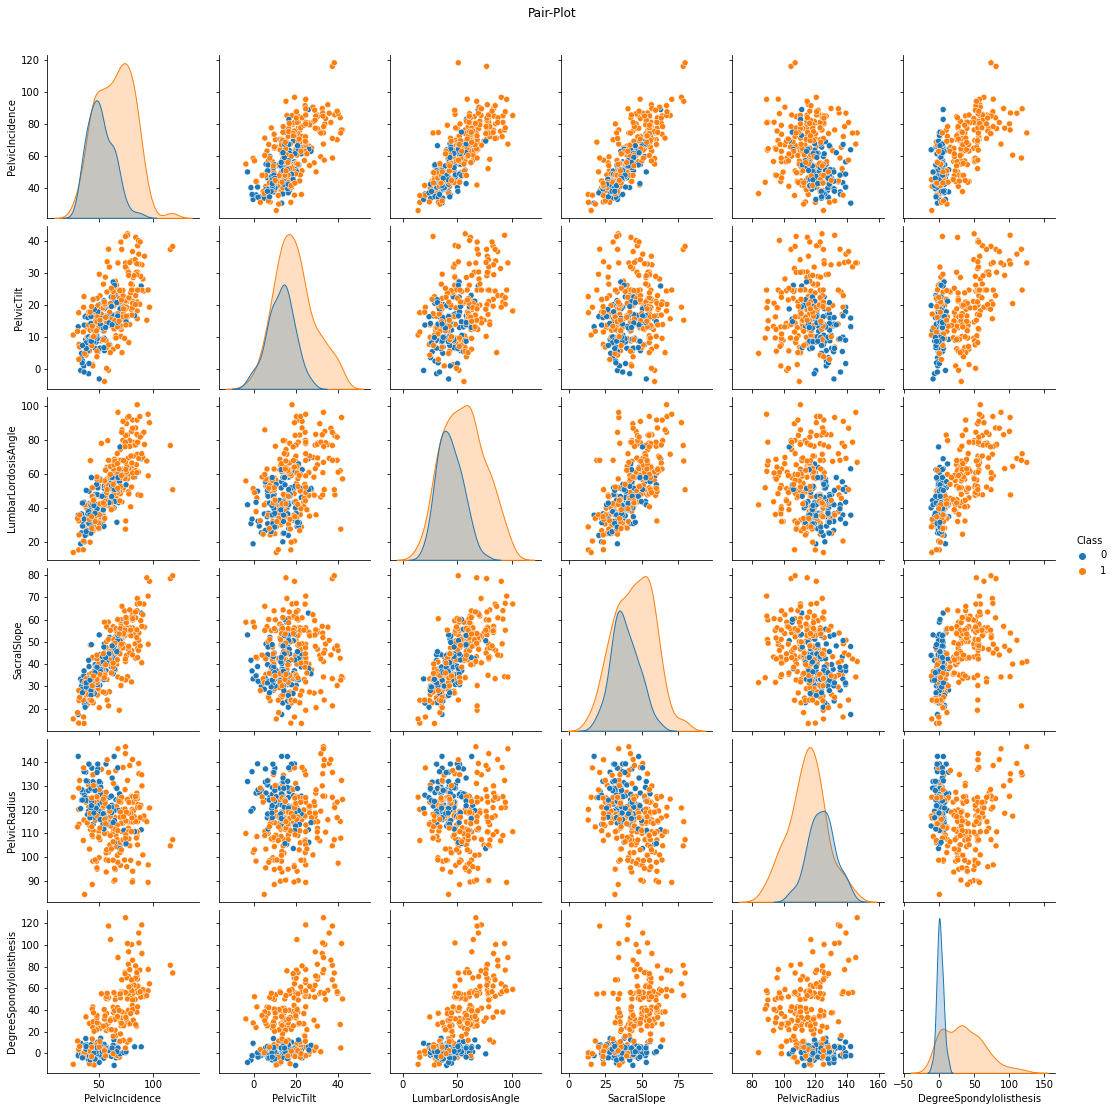

In [693]:
plt.figure()
sns.pairplot(df,hue = "Class")
plt.suptitle('Pair-Plot',y = 1.03)
plt.savefig('PairPlot.pdf',bbox_inches='tight');

[0.10890965 0.1282453  0.12493193 0.11615986 0.17597191 0.34578135]


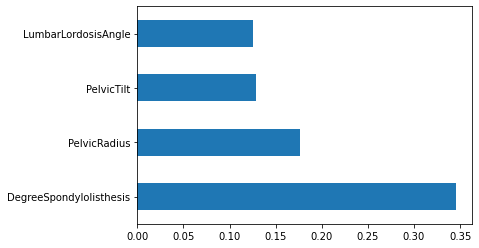

In [694]:
X = df.iloc[:,0:6]  #independent columns
y = df.iloc[:,-1]    #target column 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

In [695]:
df1 = df.drop('Class',axis = 1)
df1.head()

,PelvicIncidence,PelvicTilt,LumbarLordosisAngle,SacralSlope,PelvicRadius,DegreeSpondylolisthesis
0,58.10,14.84,79.65,43.26,113.59,50.24
1,56.45,19.44,43.58,37.00,139.19,-1.86
2,92.03,35.39,77.42,56.63,115.72,58.06
3,38.66,12.99,40.00,25.68,124.91,2.70
4,38.70,13.44,31.00,25.25,123.16,1.43


In [696]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Minmax_scaled = scaler.fit_transform(df1)
Minmax_scaled_df = pd.DataFrame(Minmax_scaled,columns=['PelvicIncidence','PelvicTilt','LumbarLordosisAngle','SacralSlope','PelvicRadius','DegreeSpondylolisthesis'])
Minmax_scaled_df.head()

,PelvicIncidence,PelvicTilt,LumbarLordosisAngle,SacralSlope,PelvicRadius,DegreeSpondylolisthesis
0,0.347320,0.402946,0.756860,0.450626,0.471637,0.450603
1,0.329384,0.502600,0.341019,0.356249,0.883015,0.067627
2,0.716165,0.848137,0.731151,0.652194,0.505865,0.508086
3,0.135993,0.362868,0.299746,0.185587,0.653543,0.101147
4,0.136428,0.372617,0.195988,0.179104,0.625422,0.091811


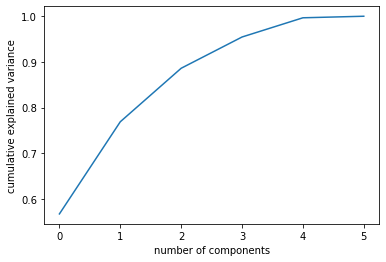

In [697]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)
standard_scaled_df = pd.DataFrame(scaled_data,columns=['PelvicIncidence','PelvicTilt','LumbarLordosisAngle','SacralSlope','PelvicRadius','DegreeSpondylolisthesis'])
from sklearn.decomposition import PCA
plt.figure()
plt.plot(np.cumsum(PCA().fit(scaled_data).explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [698]:
pca = PCA(n_components=4)
up_data = pca.fit_transform(scaled_data)
up_data

array([[ 1.05140766, -0.18000743, -0.46700321,  1.0542215 ],
       [-1.07996203,  1.46519257, -0.62162896, -0.98835633],
       [ 3.35536746,  0.68576954,  0.59305086, -0.49275418],
       ...,
       [ 1.64995396,  3.58780127,  0.69375516,  2.33516759],
       [-0.09862264, -0.30309736,  1.72716029,  0.04613277],
       [ 1.30112098,  0.57298888,  1.21479418,  0.96831242]])

In [699]:
up_df = pd.DataFrame(up_data,columns=['PC1','PC2','PC3','PC4'])
up_df['Class'] = df['Class']
up_df

,PC1,PC2,PC3,PC4,Class
0,1.051408,-0.180007,-0.467003,1.054221,1
1,-1.079962,1.465193,-0.621629,-0.988356,0
2,3.355367,0.685770,0.593051,-0.492754,1
3,-2.121827,0.599332,-0.002507,0.268879,1
4,-2.356586,0.494888,0.279090,0.212013,1
...,...,...,...,...,...
305,-2.025419,0.981401,0.636049,-0.149223,1
306,-1.124575,0.715378,-0.852170,0.847798,1
307,1.649954,3.587801,0.693755,2.335168,1
308,-0.098623,-0.303097,1.727160,0.046133,1


In [700]:
X = df1
X1 = standard_scaled_df
X2 = Minmax_scaled_df
y = df.Class
XPCA = up_df.drop('Class',axis =1)
yPCA = up_df.Class

In [701]:
from sklearn.model_selection import train_test_split
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X,y,random_state=0,test_size=0.2)

Text(0.5, 1.0, 'Distribution of class in Training data')

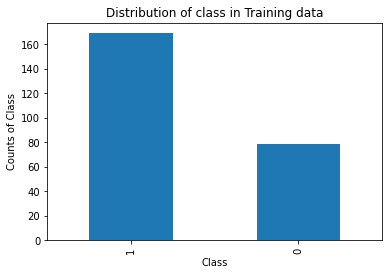

In [702]:
#We try visualizing our training and test data to see if both class problems are equally distributed
train_clss_dist = ytrain1.value_counts()
test_clss_dist = ytest1.value_counts()
plt.figure()
train_clss_dist.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Counts of Class')
plt.title('Distribution of class in Training data')


Text(0.5, 1.0, 'Distribution of class in Test data')

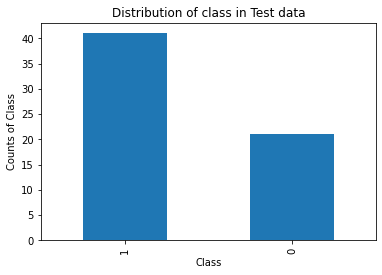

In [703]:
plt.figure()
test_clss_dist.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Counts of Class')
plt.title('Distribution of class in Test data')

# Comparing different Machine Learning Algorithms for Original Data

In [704]:
from sklearn import tree
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,5,10,15,20],
            'kernel': ['rbf','linear','poly']
        }  
    },
    'DecisionTree': {
        'model': tree.DecisionTreeClassifier(),
        'params' : {
            'max_depth': [1,2,3,4,5,6,7,8,9,10,None],
            'criterion': ['gini','entropy']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'solver':['liblinear','lbfgs','newton-cg'],
            'C': [1,5,10]
        }
    },
    'KNeighborsClassifier' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3,5,9,13,15,19,23]
        }
    }
}

In [705]:
%%time
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=4, return_train_score=False,n_jobs = -1)
    if model_name == 'DecisionTree':
        clf.fit(X, y)
    else:
        clf.fit(X1,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
Score_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
Score_df

Wall time: 3.04 s


,model,best_score,best_params
0,svm,0.867674,"{'C': 1, 'kernel': 'rbf'}"
1,DecisionTree,0.841908,"{'criterion': 'entropy', 'max_depth': 6}"
2,logistic_regression,0.877331,"{'C': 1, 'solver': 'lbfgs'}"
3,KNeighborsClassifier,0.848277,{'n_neighbors': 23}


# Comparing different Machine Learning Algorithms for PCA Data

In [706]:
%%time
scores_PCA = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=4, return_train_score=False,n_jobs = -1)
    clf.fit(XPCA, yPCA)
    scores_PCA.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
ScorePCA_df = pd.DataFrame(scores_PCA,columns=['model','best_score','best_params'])
ScorePCA_df

Wall time: 485 ms


,model,best_score,best_params
0,svm,0.880536,"{'C': 15, 'kernel': 'linear'}"
1,DecisionTree,0.851648,"{'criterion': 'entropy', 'max_depth': 8}"
2,logistic_regression,0.880495,"{'C': 1, 'solver': 'liblinear'}"
3,KNeighborsClassifier,0.838661,{'n_neighbors': 23}


## Neural Network Algorithm 

In [707]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [708]:
X2_ = X2.to_numpy()
y2_ = y.to_numpy()
y2_ = y2_.reshape(-1,1)
X_2, y_2 = shuffle(X2_, y2_,random_state = 4)

In [709]:
model = Sequential([
    Dense(units = 20, input_shape = (6,), activation = 'relu'),
    Dense(units = 40, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

In [710]:
model.compile(optimizer = Adam(learning_rate = 0.001),loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [711]:
model.fit(x=X_2, y=y_2, validation_split=0.2, shuffle=True, batch_size= 5, epochs = 50, verbose=2 )

Epoch 1/50
50/50 - 0s - loss: 0.6591 - accuracy: 0.6129 - val_loss: 0.5949 - val_accuracy: 0.6774
Epoch 2/50
50/50 - 0s - loss: 0.5603 - accuracy: 0.6774 - val_loss: 0.5323 - val_accuracy: 0.6774
Epoch 3/50
50/50 - 0s - loss: 0.5101 - accuracy: 0.6774 - val_loss: 0.4938 - val_accuracy: 0.6774
Epoch 4/50
50/50 - 0s - loss: 0.4702 - accuracy: 0.7137 - val_loss: 0.4583 - val_accuracy: 0.7742
Epoch 5/50
50/50 - 0s - loss: 0.4357 - accuracy: 0.7944 - val_loss: 0.4282 - val_accuracy: 0.8226
Epoch 6/50
50/50 - 0s - loss: 0.4048 - accuracy: 0.7984 - val_loss: 0.4093 - val_accuracy: 0.7903
Epoch 7/50
50/50 - 0s - loss: 0.3829 - accuracy: 0.8306 - val_loss: 0.3863 - val_accuracy: 0.8548
Epoch 8/50
50/50 - 0s - loss: 0.3605 - accuracy: 0.8468 - val_loss: 0.3612 - val_accuracy: 0.7742
Epoch 9/50
50/50 - 0s - loss: 0.3418 - accuracy: 0.8710 - val_loss: 0.3578 - val_accuracy: 0.8387
Epoch 10/50
50/50 - 0s - loss: 0.3241 - accuracy: 0.8710 - val_loss: 0.3260 - val_accuracy: 0.8226
Epoch 11/50
50/50 -

In [712]:
X_test = X_2[248:311]
y_test = y_2[248:311]
predictions = model.predict(x=X_test)


In [713]:
rounded_predictions = np.argmax(predictions,axis=1)
rounded_predictions

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [714]:
y_test.reshape(1,-1)

array([[1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1]],
      dtype=int64)

In [715]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)

In [716]:
def plot_confusion_matrix(cm,
                          classes,
                          title='Confusion matrix',
                          cmap= plt.get_cmap('Blues'),
                          normalize=False):
    import itertools
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation =90)
    plt.yticks(tick_marks,classes)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

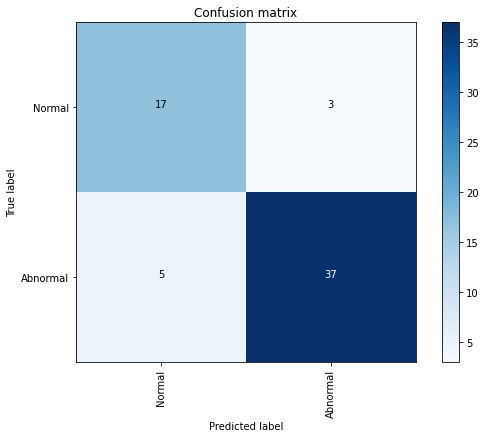

In [717]:
plot_labels = ['Normal','Abnormal']
plot_confusion_matrix(cm=cm, classes = plot_labels)

# For illustration purpose only

In [718]:
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=4, return_train_score=False)
clf.fit(X, y)
Illus_df = pd.DataFrame(clf.cv_results_)
Illus_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007236,1.289961e-03,0.003497,5.056550e-04,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.679487,0.679487,0.675325,0.675325,0.677406,0.002081,4
1,0.021203,4.319544e-03,0.001488,4.901863e-04,1,linear,"{'C': 1, 'kernel': 'linear'}",0.871795,0.858974,0.831169,0.883117,0.861264,0.019361,3
2,0.005984,3.576279e-07,0.002993,1.276987e-06,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.679487,0.679487,0.675325,0.675325,0.677406,0.002081,4
3,0.115692,4.426619e-02,0.001495,4.987151e-04,10,linear,"{'C': 10, 'kernel': 'linear'}",0.871795,0.846154,0.831169,0.896104,0.861305,0.024793,1
4,0.005984,2.598106e-07,0.002992,1.976862e-07,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.679487,0.679487,0.675325,0.675325,0.677406,0.002081,4
5,0.306942,1.714072e-01,0.001741,4.293124e-04,20,linear,"{'C': 20, 'kernel': 'linear'}",0.871795,0.846154,0.831169,0.896104,0.861305,0.024793,1
